<h1 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    Prediction Agreement Reached (PAR) for Workers' Compensation Claims
</h1>
<hr style="border: 2px solid #4A90E2;">

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">Required Imports</h2>

<hr style="border: 2px solid #4A90E2;">

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">Package Descriptions</h3>
<ul style="font-family: 'Arial', sans-serif;">
    <li><strong>pandas</strong>: For data manipulation and analysis, enabling easy reading and handling of dataframes.</li>
    <li><strong>numpy</strong>: For efficient numerical operations and array manipulation.</li>
    <li><strong>matplotlib.pyplot</strong>: To create data visualizations and plots.</li>
    <li><strong>seaborn</strong>: For generating attractive and informative statistical visualizations.</li>
    <li><strong>missingno</strong>: For visualizing and analyzing missing data, helping to better understand data quality.</li>
</ul>


In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import sys # type: ignore
import os # type: ignore

from sklearn.model_selection import train_test_split # type: ignore
from imblearn.over_sampling import SMOTE # type: ignore


sys.path.append(os.path.abspath("../utils"))
from meta_model_train import meta_model_lr, meta_model_gb
from neural_network import neural_network
from plots import plot_training_history, plot_confusion_matrix
from predicitons_csv import save_predictions_to_csv_ar
from save_models import save_model

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Data Loading
</h2>
<hr style="border: 1px solid #4A90E2;">

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section handles loading the dataset into the environment for further processing. Using <strong>pandas</strong>, we load the data into a structured dataframe, allowing for easy manipulation, exploration, and analysis throughout the project.
</p>


In [2]:
path = "../data/"

X_train_ar = pd.read_csv(path + "X_train_ar_post_FS.csv")
y_train_ar = pd.read_csv(path + "y_train_ar_post_FS.csv")
X_val_ar = pd.read_csv(path + "X_val_ar_post_FS.csv")
y_val_ar = pd.read_csv(path + "y_val_ar_post_FS.csv")

data_test_ar = pd.read_csv(path + "data_test_ar_post_FS.csv")

data = pd.read_csv(path + "Agreement_Reached_mapping.csv")

In [ ]:
mapping_dict = dict(zip(data['Encoded Value'], data['Agreement Reached']))

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Model Selection
</h2>
<hr style="border: 1px solid #4A90E2;">

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section focuses on selecting the best-performing models for predicting workers' compensation claims outcomes. Various machine learning algorithms are evaluated based on their accuracy, interpretability, and suitability for the dataset, ensuring an optimal balance between predictive performance and computational efficiency.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 2px 2px #D1D1D1;">Logistic Regression</h3>

In [5]:
models_lr, f1_scores_lr, oof_predictions_lr, test_predictions_lr = meta_model_lr(
            X_train_ar, y_train_ar, data_test_ar, n_splits_n=5, num_classes_n=y_train_ar['Agreement Reached'].nunique()
)

Training Fold 1...
Macro F1-Score do Fold 1: 0.5086
Training Fold 2...
Macro F1-Score do Fold 2: 0.5020
Training Fold 3...
Macro F1-Score do Fold 3: 0.5114
Training Fold 4...
Macro F1-Score do Fold 4: 0.5092
Training Fold 5...
Macro F1-Score do Fold 5: 0.5163
Treinamento concluído em 3.66 minutos.


In [6]:
nn_model_lr, X_nn_train, X_nn_val, y_nn_val, y_nn_train, early_stopping, reduce_lr = neural_network(oof_predictions_lr, y_train_ar)

history = nn_model_lr.fit(
    X_nn_train, y_nn_train,
    validation_data=(X_nn_val, y_nn_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

save_model(nn_model_lr, "LR_NN_model_ar")

Epoch 1/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8844 - loss: 0.4379 - val_accuracy: 0.9521 - val_loss: 0.1583 - learning_rate: 0.0010
Epoch 2/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9535 - loss: 0.1563 - val_accuracy: 0.9515 - val_loss: 0.1575 - learning_rate: 0.0010
Epoch 3/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9533 - loss: 0.1553 - val_accuracy: 0.9521 - val_loss: 0.1578 - learning_rate: 0.0010
Epoch 4/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9533 - loss: 0.1549 - val_accuracy: 0.9521 - val_loss: 0.1576 - learning_rate: 0.0010
Epoch 5/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9529 - loss: 0.1559 - val_accuracy: 0.9513 - val_loss: 0.1582 - learning_rate: 0.0010
Epoch 6/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9537 - loss: 0.1541 - val_accuracy: 0.9517 - val_loss: 0.1576 - learning_rate: 0.0010
Epoch 7/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9

'../models/LR_NN_model_ar.pkl'

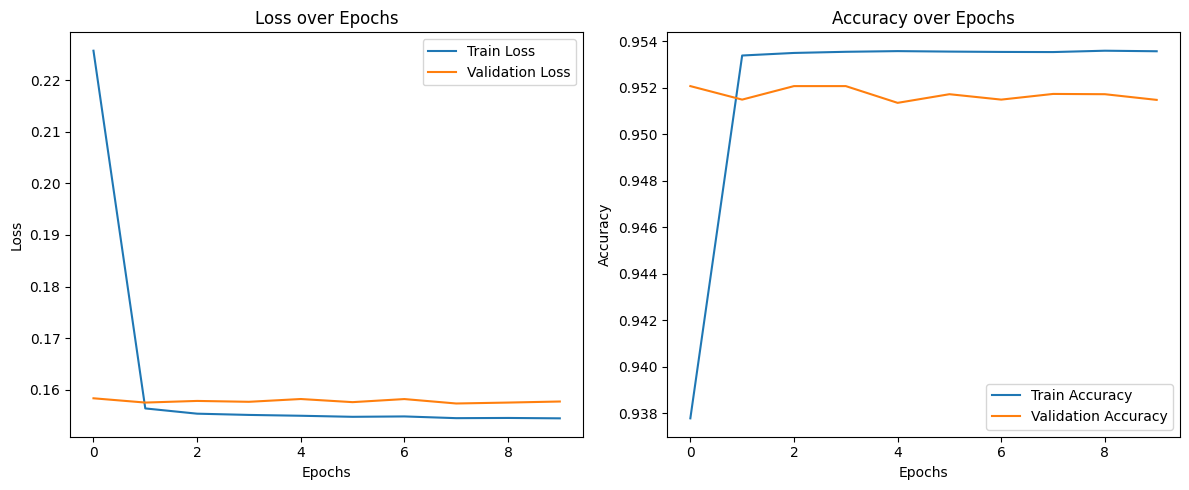

In [7]:
plot_training_history(history)

2691/2691 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


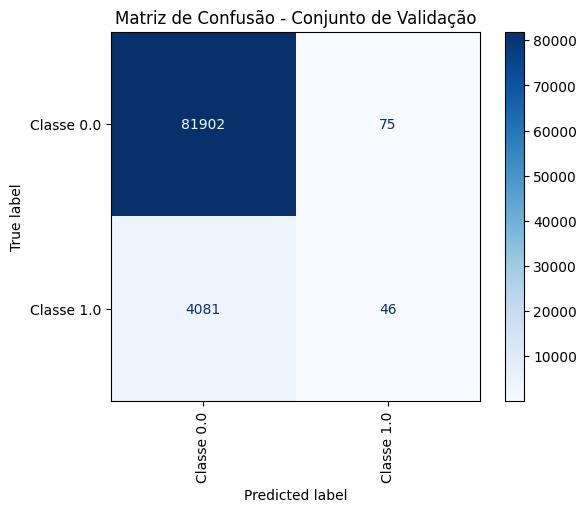

              precision    recall  f1-score   support

  Classe 0.0       0.95      1.00      0.98     81977
  Classe 1.0       0.38      0.01      0.02      4127

    accuracy                           0.95     86104
   macro avg       0.67      0.51      0.50     86104
weighted avg       0.93      0.95      0.93     86104



In [8]:
plot_confusion_matrix(model=nn_model_lr, X_val=X_nn_val, y_val=y_nn_val,
    class_mapping=mapping_dict , title="Matriz de Confusão - Conjunto de Validação"
)

In [9]:
save_predictions_to_csv_ar(
    model=nn_model_lr,
    test_data=test_predictions_lr,
    claim_ids=data_test_ar["Claim Identifier"],
    output_path="../predictions/group_40_KFold_LR_NN_predictions_AR.csv"
    )

12125/12125 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
Predições salvas em '../predictions/group_40_KFold_LR_NN_predictions_AR.csv'.


In [10]:
predicitons_data = pd.read_csv('../predictions/group_40_KFold_LR_NN_predictions_AR.csv')
values = predicitons_data['Agreement Reached'].value_counts()
values

Agreement Reached
0    386852
1      1123
Name: count, dtype: int64

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 2px 2px #D1D1D1;">Gradient Boost Classifier</h3>

In [11]:
models_gb, f1_scores_gb, oof_predictions_gb, test_predictions_gb = meta_model_gb(
            X_train_ar, y_train_ar, data_test_ar, n_splits_n=5, num_classes_n=y_train_ar['Agreement Reached'].nunique()
)

Training Fold 1...
Macro F1-Score do Fold 1: 0.5989
Training Fold 2...
Macro F1-Score do Fold 2: 0.5911
Training Fold 3...
Macro F1-Score do Fold 3: 0.6012
Training Fold 4...
Macro F1-Score do Fold 4: 0.6031
Training Fold 5...
Macro F1-Score do Fold 5: 0.6058
Treinamento concluído em 14.67 minutos.


In [12]:
nn_model_gb, X_nn_train, X_nn_val, y_nn_val, y_nn_train, early_stopping, reduce_lr = neural_network(oof_predictions_gb, y_train_ar)

history = nn_model_gb.fit(
    X_nn_train, y_nn_train,
    validation_data=(X_nn_val, y_nn_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

save_model(nn_model_gb, "GB_NN_model_ar")

Epoch 1/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8933 - loss: 0.4139 - val_accuracy: 0.9549 - val_loss: 0.1181 - learning_rate: 0.0010
Epoch 2/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9546 - loss: 0.1203 - val_accuracy: 0.9549 - val_loss: 0.1231 - learning_rate: 0.0010
Epoch 3/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9558 - loss: 0.1161 - val_accuracy: 0.9552 - val_loss: 0.1175 - learning_rate: 0.0010
Epoch 4/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9552 - loss: 0.1167 - val_accuracy: 0.9552 - val_loss: 0.1176 - learning_rate: 0.0010
Epoch 5/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9568 - loss: 0.1140 - val_accuracy: 0.9554 - val_loss: 0.1188 - learning_rate: 0.0010
Epoch 6/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9562 - loss: 0.1157 - val_accuracy: 0.9549 - val_loss: 0.1167 - learning_rate: 0.0010
Epoch 7/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9

'../models/GB_NN_model_ar.pkl'

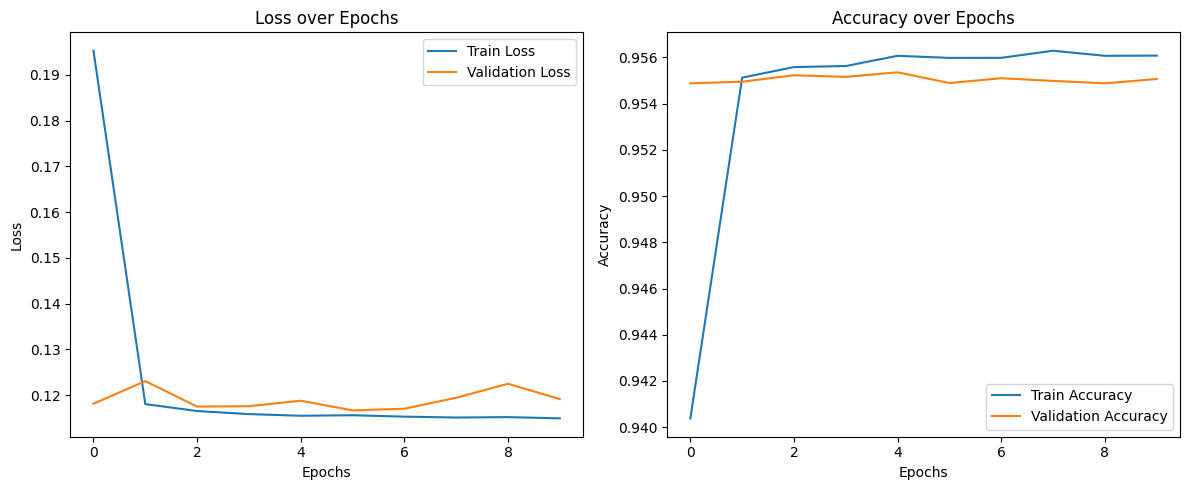

In [13]:
plot_training_history(history)

2691/2691 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


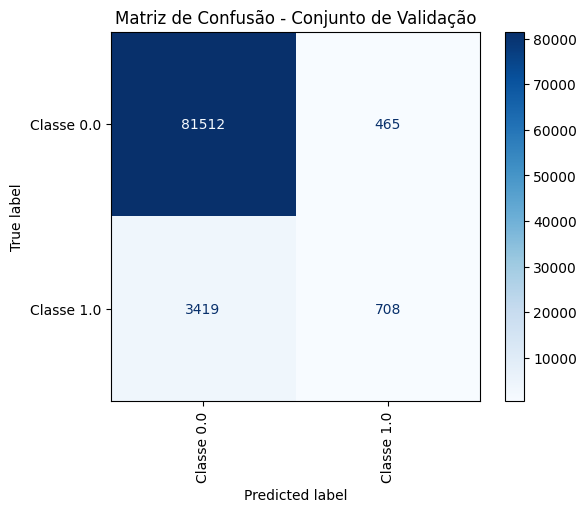

              precision    recall  f1-score   support

  Classe 0.0       0.96      0.99      0.98     81977
  Classe 1.0       0.60      0.17      0.27      4127

    accuracy                           0.95     86104
   macro avg       0.78      0.58      0.62     86104
weighted avg       0.94      0.95      0.94     86104



In [14]:
plot_confusion_matrix(model=nn_model_gb, X_val=X_nn_val, y_val=y_nn_val,
    class_mapping=mapping_dict , title="Matriz de Confusão - Conjunto de Validação"
)

In [15]:
save_predictions_to_csv_ar(
    model=nn_model_gb,
    test_data=test_predictions_gb,
    claim_ids=data_test_ar["Claim Identifier"],
    output_path="../predictions/group_40_KFold_GB_NN_predictions_AR.csv"
    )

12125/12125 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
Predições salvas em '../predictions/group_40_KFold_GB_NN_predictions_AR.csv'.


In [16]:
predicitons_data = pd.read_csv('../predictions/group_40_KFold_GB_NN_predictions_AR.csv')
values = predicitons_data['Agreement Reached'].value_counts()
values

Agreement Reached
0    387088
1       887
Name: count, dtype: int64

In [17]:
data_test_ar = data_test_ar.set_index('Claim Identifier')
predictions_data_n = predicitons_data.set_index('Claim Identifier')

data_test_ar['Agreement Reached'] = predictions_data_n['Agreement Reached']
data_test_ar = data_test_ar.reset_index()

data_test_ar.to_csv('../data/data_test_post_PAR.csv', index=False)